## 2.1 Example - Using the Experiment Class to Normalize XANES, Extract EXAFS and Perform Fourier-Transofrm of the EXAFS 

    In this example XAS data will be read into the Experiment Class object and bulk processed.

    This example assumes that you have previoudly run '2.0 Example - Experiment Class -  XAS Data Processing' and have a saved 'pickled' experiment.


### Additional XAS processing steps will: 
    1. Normalize Spectra
    2. Extract EXAFS Spectra
    3. Fourier Transform the EXAFS Spectra  
    
### Steps:
    
    1. Import Modules
    2. Define Paths
    3. Open Saved Experiment using 'pickle'
    4. Normalize Spectra
    5. Extract EXAFS
    6. Perform Fourier-transform on EXAFS
    7. Save Experiment with 'pickle' 

### Things to have ready when attemtping this example:

    1. Directory and filename for the 'pickled' experiment 
    2. Scan name of one spectra in the experiment object
    
    
## Step 1. Import Modules

In [1]:
# File Handling
import os
import pickle

# Wrapper for xraylarch (larch)
os.chdir('..')
pwd = os.getcwd()
os.chdir('./catxas')
import general as fcts
import xas as xfcts
import plot as pfcts
import process
import experiment as exp

# Plot Handling
%matplotlib inline

## Step 2. Define Paths

#### Modify:
    1. pickle_dir - directory containing the pickled experiment
    2. pickpe_name - filename of the pickled experiment (must include extension '.pickle')
    3. scan_name - a name of one fo the spectra in the experiment, used for interrogation throughout

In [2]:
# Directory Containing Experiment:
pickle_dir = os.path.join(pwd, 'sample results')

# Name of Experiment (must include extension '.pickle')
pickle_name = 'SnO2_TPR.pickle'

# Scan Naame for looking at parts of the Experiment Object
scan_name = '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0001'

## Step 3. Open Saved Experiment using 'pickle'

    Pickle - A method to save the experimental class and reopen it elsewhere.

In [3]:
pickle_path = os.path.join(pickle_dir,pickle_name)
pickle_in = open(pickle_path,"rb")
my_exp = pickle.load(pickle_in)
pickle_in.close()

## Step 4. Normalize Spectra

    Normalization using the same parameters as Athena.

### Major steps for normalization will:
    a. Scan the energy ranges of the data and suggest normalization parameters (spectra files need an E0 value)
    b. Set the normalization parameters
    c. Normalize the spectra

### 4a. Define normalization paramaters

In [4]:
# Inspect each spectrum's energy range and suggest normalization paramters

df1 = my_exp.check_Energy_Range(has_e0 = True, spectra_name = 'mu Sample', print_summary = True)

df2 = my_exp.check_Energy_Range(has_e0 = True, spectra_name = 'mu Reference', print_summary = True)

Energy Range and Energy-Step Summary for mu Sample
	Variation in starting energy points between spectra [eV]: 29004.24-29004.75
	Variation in ending energy points between spectra [eV]: 30175.00-30175.45
	Variation in step size of energy points between spectra [eV]: 0.24-0.24

Normalization Parameters for mu Sample
	Edge Energy Range [E0]: 29201.65-29201.65 eV
	Pre-edge start/stop Suggestion [pre1/pre2]: -150/-50
	Post-edge start/stop Suggestion [norm1/norm2]: 75/700
	Normalizaion order Suggestion [nnorm]: 2
	Flatten Spectra Suggestion [make_norm]: True

Energy Range and Energy-Step Summary for mu Reference
	Variation in starting energy points between spectra [eV]: 29004.24-29004.75
	Variation in ending energy points between spectra [eV]: 30175.00-30175.45
	Variation in step size of energy points between spectra [eV]: 0.24-0.24

Normalization Parameters for mu Reference
	Edge Energy Range [E0]: 29200.00-29200.00 eV
	Pre-edge start/stop Suggestion [pre1/pre2]: -150/-50
	Post-edge start/s

In [5]:
# Update values in the dictionary based upon summary results above

#Refernece Normalization paramters, referenced to E0
Ref_norm_params = {'pre1': -150,
                    'pre2': -50,
                    'norm1': 75,
                    'norm2': 700,
                    'nnorm': 2,
                    'make_flat': True
                   }

#Sample Normalization paramters, referenced to E0
Samp_norm_params = {'pre1': -150,
                    'pre2': -50,
                    'norm1': 75,
                    'norm2': 700,
                    'nnorm': 2,
                    'make_flat': True
                   }

### 4b. Import parameters into each spectrum's larch group

Note: This step can be repeated as needed tp upload additiona parameters

In [6]:
# Load normalization parameters into larch groups

# Sample
my_exp.load_params('mu Sample', Samp_norm_params)

# Reference
my_exp.load_params('mu Reference', Ref_norm_params)

### 4c. Normalize the spectra

Note: Normalization steps can be run with updated parameters as needed.

In [7]:
# Normalize Specta
my_exp.normalize_spectra('mu Reference')
my_exp.normalize_spectra('mu Sample')

#### Inspection tools to show results of the spectra normalization
    1. Updated larch groups - experiment.spectra[scan_name]['Absorption Spectra']['mu Sample']
    2. Visualization of the normalized spectra

In [8]:
# 1. Inpsect updated 'mu Sample' group 

my_exp.spectra[scan_name]['Absorption Spectra']['mu Sample']

Attribute,Type
energy,ndarray
mu,ndarray
delE,float
e0,float64
pre1,int
pre2,int
norm1,int
norm2,int
nnorm,int
make_flat,bool


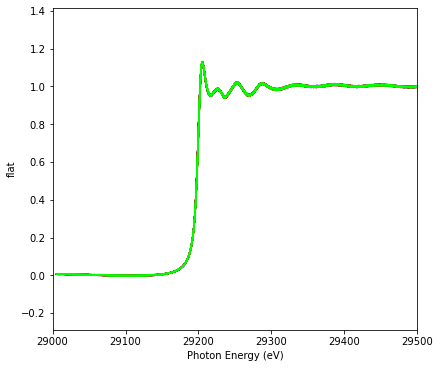

In [9]:
# 2a. Visualization of Normalized Spectra - Reference

# MODIFY: emin, emax 

emin = 29000
emax = 29500 


# DO NOT MODIFY BELOW
    
R_groups = []

for key in my_exp.spectra.keys():
    R_groups.append(my_exp.spectra[key]['Absorption Spectra']['mu Reference'])

pfcts.plot_XANES(R_groups, emin, emax, spectra = 'flat', 
                 deriv = False, e0 = None, e0_line = False, 
                 overlay = True, use_legend = False)

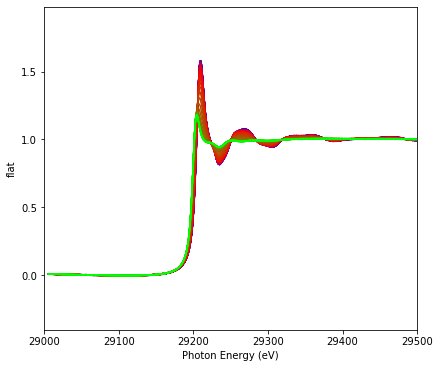

In [10]:
# 2. Visualization of Normalized Spectra - Sample

# MODIFY: emin, emax 

emin = 29000
emax = 29500 


# DO NOT MODIFY BELOW

S_groups = []


for key in my_exp.spectra.keys():
    S_groups.append(my_exp.spectra[key]['Absorption Spectra']['mu Sample'])
    
pfcts.plot_XANES(S_groups, emin, emax, spectra = 'flat', 
                 deriv = False, e0 = None, e0_line = False, 
                 overlay = True, use_legend = False)


## Step 5. Extract EXAFS

    EXAFS extraction follows the same steps as Athena.

### Major Steps for EXAFS extraction:

    a. Define background subtraction parameters
    b. Import parameters into each spectrum's larch group
    c. Extract EXAFS

### 5a. Define background subtraction parameters

#### Modify:
    Paramters below. each paramters is annotated if there are preferred/required values

In [11]:
# Sample background subtraction paramters

Samp_bkg_params = {'rbkg': 1,
                  'nknots': None, 
                  'kmin': 0, # Default value = 0, lower spline range
                  'kmax': None, # Default value = None, upper spline range
                  'kweight': 1, # Default value = 1, Rarely Change
                  'dk': 0.1,
                  'win': 'hanning', 
                  'nfft': 2048, # Never Change 
                  'kstep': 0.05, # Never Change
                  'k_std': None, # Never Change
                  'chi_std': None, # Never Change
                  'nclamp': 2,
                  'clamp_lo': 1, 
                  'clamp_hi': 1, 
                  'err_sigma': 1
                   }

# Refernece background subtraction paramters

Ref_bkg_params = {'rbkg': 1,
                  'nknots': None, 
                  'kmin': 0, # Default value = 0, lower spline range
                  'kmax': 13, # Default value = None, upper spline range
                  'kweight': 1, # Default value = 1, Rarely Change
                  'dk': 0.1,
                  'win': 'hanning', 
                  'nfft': 2048, # Never Change 
                  'kstep': 0.05, # Never Change
                  'k_std': None, # Never Change
                  'chi_std': None, # Never Change
                  'nclamp': 2,
                  'clamp_lo': 1, 
                  'clamp_hi': 50, 
                  'err_sigma': 1
                   }

### 5b. Import parameters into each spectrum's larch group

In [12]:
# Load background subtraction parameters into larch groups

# Sample
my_exp.load_params('mu Sample', Samp_bkg_params)

# Reference
my_exp.load_params('mu Reference', Ref_bkg_params)

### 5c. Extract EXAFS

In [13]:
# Extract EXAFS for each spectum

# Sample
my_exp.extract_EXAFS_spectra('mu Sample')

# Reference
my_exp.extract_EXAFS_spectra('mu Reference')

#### Inspection tools to show results of the EXAFS Extraction
    1. Updated larch groups - experiment.spectra[scan_name]['Absorption Spectra']['mu Sample']
    2. Visualization of the extracted EXAFS

In [14]:
# 1. Inpsect updated 'mu Sample' group 

my_exp.spectra[scan_name]['Absorption Spectra']['mu Sample']

Attribute,Type
energy,ndarray
mu,ndarray
delE,float
e0,float64
pre1,int
pre2,int
norm1,int
norm2,int
nnorm,int
make_flat,bool


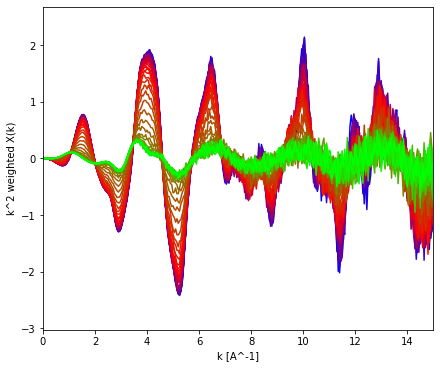

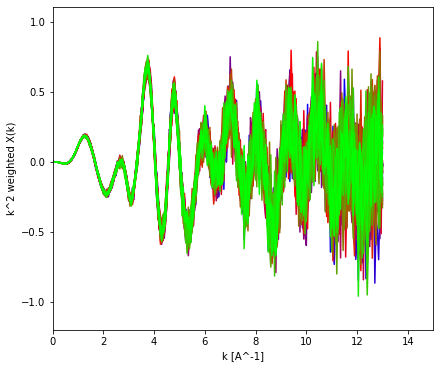

In [15]:
# 2. Visualization of the Extracted EXAFS

# MODIFY: k_weight, kmin, kmax for Sample and Reference

Samp_k_wt = 2
Samp_kmin = 0
Samp_kmax = 15

Ref_k_wt = 2
Ref_kmin = 0
Ref_kmax = 15

# DO NOT MODIFY BELOW

# Sample

S_groups = []

for key in my_exp.spectra.keys():
    S_groups.append(my_exp.spectra[key]['Absorption Spectra']['mu Sample'])
    
pfcts.plot_chi(S_groups, kweight = Samp_k_wt, kmin = Samp_kmin, kmax = Samp_kmax,
               overlay = True, use_legend = False)

# Reference
    
R_groups = []

for key in my_exp.spectra.keys():
    R_groups.append(my_exp.spectra[key]['Absorption Spectra']['mu Reference'])

pfcts.plot_chi(R_groups, kweight = Ref_k_wt, kmin = Ref_kmin, kmax = Ref_kmax, 
               overlay = True, use_legend = False)

## Step 6. Perform Fourier-transform on EXAFS

    Fourier-transform of the extracted EXAFS follows the same steps as Athena.

### Major Steps for Fourier-transform:

    a. Define Fourier-transform parameters
    b. Import parameters into each spectrum's larch group
    c. perform Fourier-transform

    Note: multiple paramters are shared between the background subtraction and the FT. kmin, kmac, and kweight, are the big ones. No plans yets to change this... 

### 6a. Define Fourier-transform parameters

#### Modify:
    Paramters below. Each paramters is annotated if there are preferred/required values

In [16]:
# Refernece FT paramters
Ref_FT_params = {'rmax_out': 10,
                  'kmin': 3,
                  'kmax': 11,
                  'kweight': 2,
                  'dk': 5,
                  'dk2': 5,
                  'window': 'haning',
                  'nfft': 2048, # Never Change
                  'kstep': 0.05 # Never Change
                 }

# Sample FT paramters
Samp_FT_params = {'rmax_out': 10,
                  'kmin': 3,
                  'kmax': 11,
                  'kweight': 2,
                  'dk': 5,
                  'dk2': 5,
                  'window': 'haning',
                  'nfft': 2048, # Never Change
                  'kstep': 0.05 # Never Change
                 }

### 6b. Import parameters into each spectrum's larch group

In [17]:
# Load FT parameters into larch groups

# Sample
my_exp.load_params('mu Sample', Samp_FT_params)

# Reference
my_exp.load_params('mu Reference', Ref_FT_params)

### 6c. Perform Fourier-transform

In [18]:
# Perform FT of EXAFS for each spectum

# Sample
my_exp.FT_EXAFS_spectra('mu Sample')

# Reference
my_exp.FT_EXAFS_spectra('mu Reference')

#### Inspection tools to show results of the Fourier-tranform
    1. Updated larch groups - experiment.spectra[scan_name]['Absorption Spectra']['mu Sample']
    2. Visualization of the FT EXAFS

In [19]:
# 1. Inpsect updated 'mu Sample' group 

my_exp.spectra[scan_name]['Absorption Spectra']['mu Sample']

Attribute,Type
energy,ndarray
mu,ndarray
delE,float
e0,float64
pre1,int
pre2,int
norm1,int
norm2,int
nnorm,int
make_flat,bool


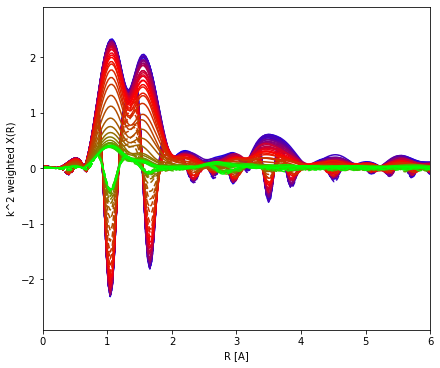

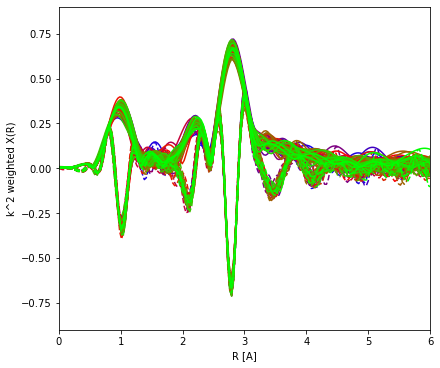

In [20]:
# 2. Visualization of the Fourier-Transformed EXAFS

# MODIFY: Rmin, Rmax, magnitide, imaginary, real for Sample and Reference

Samp_Rmin = 0
Samp_Rmax = 6
Samp_magnitude = True # Show Magnutide of FT
Samp_imaginary = True # Show Imaginary Component of FT
Samp_real = False # Show Real Component of FT

Ref_Rmin = 0
Ref_Rmax = 6
Ref_magnitude = True # Show Magnutide of FT
Ref_imaginary = True # Show Imaginary Component of FT
Ref_real = False # Show Real Component of FT



# DO NOT MODIFY BELOW

# Sample

S_groups = []

for key in my_exp.spectra.keys():
    S_groups.append(my_exp.spectra[key]['Absorption Spectra']['mu Sample'])
    
pfcts.plot_FT(S_groups, Rmin = Samp_Rmin, Rmax = Samp_Rmax, 
              magnitude = Samp_magnitude, imaginary = Samp_imaginary, real = Samp_real, 
              overlay = True, use_legend = False)

# Reference
    
R_groups = []

for key in my_exp.spectra.keys():
    R_groups.append(my_exp.spectra[key]['Absorption Spectra']['mu Reference'])

pfcts.plot_FT(R_groups, Rmin = Ref_Rmin, Rmax = Ref_Rmax, 
              magnitude = Ref_magnitude, imaginary = Ref_imaginary, real = Ref_real, 
              overlay = True, use_legend = False)

## Step 7. Save Experiment with 'pickle' 
    Pickle - A method to save the experimental class and reopen it elsewhere.

In [21]:
pickle_out = open(pickle_path,"wb")
pickle.dump(my_exp, pickle_out)
pickle_out.close()